# Homework 3


**Due 11:55pm on Wed 4th March**

We study Table 13.2 on p240 of Lange and Chapter 13 Question 11 (p240) and Chapter 14 Example 14.10.1 (p264).

The table contains counts of the number of days that a given number of deaths occurred. The data are from _The London Times_ in the years 1910-1912. 

In [2]:
freq <- c(162,267,271,185,111,61,27,8,3,1)
deaths<- c(0:9)

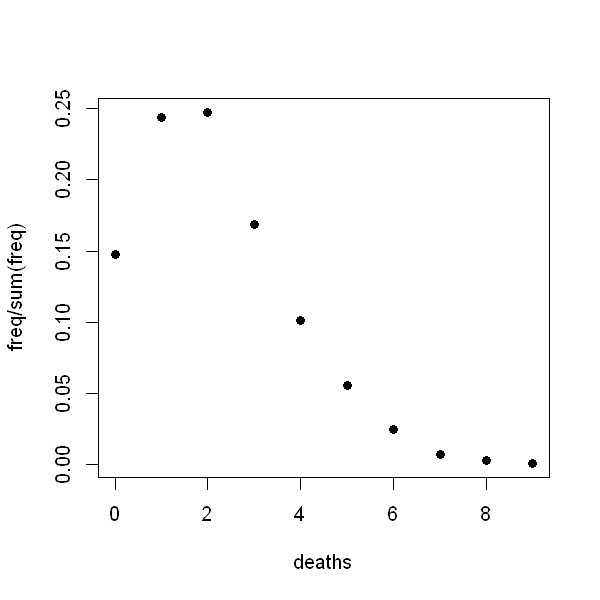

In [25]:
## proportion of different number of deaths
options(repr.plot.width=5,repr.plot.height=5)
plot(deaths,freq/sum(freq),col='black',pch=19)

## Problem 1

Confirm Lange's claim in question 11 that "A Poisson distribution gives a poor fit to these data . . ." by computing the MLE of the Poisson parameter $\lambda$ (this should be done by hand using calculus) and plotting the resulting probability mass function over the observed data. They should be a bit discrepant (thus justifying the claim).

The Poisson probability mass function is$$ f(x|\lambda) = \frac{e^{-\lambda}\lambda^x}{x!}$$

The MLE maximizes the log likelihood. 

The log likelihood for the sample is $$ 
\begin{align*}
\log f(\vec{x}) &= \log \prod_{i=1}^n f(x_i|\lambda)\ \\
                & = \sum_{i=1}^n \log f(x_i|\lambda)\ \\
                & = \sum_{i=1}^n (-\lambda + x_i\log \lambda - \log x!)\ \\
                & = -n\lambda + \sum_{i=1}^n(x_i)  \log \lambda - \sum_{i=1}^n \log x! 
\end{align*} $$

Differentienting, setting equal to $0$, and solving for $\lambda$, we obtain$$ {\lambda} = \bar{X} = \frac{1}{n}\sum_{i=1}^n x_i $$In other words, the MLE is the sample mean.


In [4]:
#Calculating Poisson parameter $\lambda$ 
mu <- (1/sum(freq))*sum(deaths*freq)
mu

[1] 2.156934

In [5]:
#Defining function to calculate factorial of a number
facto <- function(no){
  fact = 1
  if (no==0) {
    fact = 1
  } else {
    for( i in 1:no) {
      fact = fact * i
    }
  }
  return(fact)
}

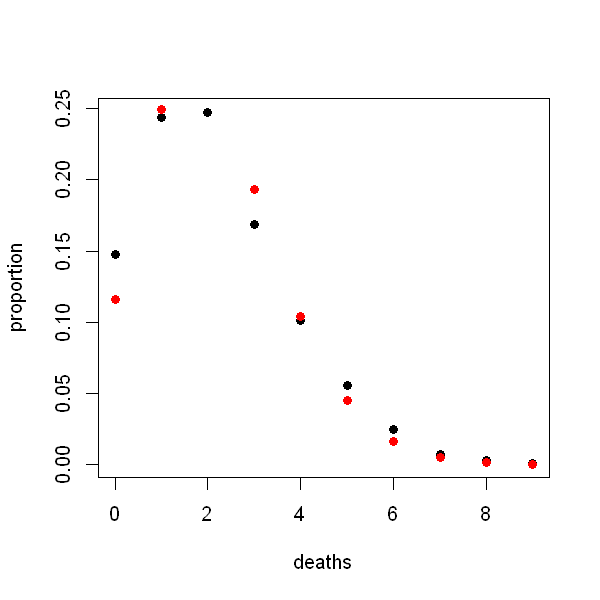

In [26]:
#Plotting resulting probability mass function over the observed data
poisson <- function(k,lambda){
  return(exp(-lambda)*(lambda)^k/facto(k))
}
x=matrix(nrow = 0,ncol=0)
for (i in 0:9){
  x=append(x,poisson(i,mu))
}
plot(deaths,freq/sum(freq),col='black',ylab = 'proportion',pch=19)
points(y=x,x=0:9,col='red',pch=19)

As we can see from the graph above there there is a discrepancy between the red and the black dots indicating that a 
single poisson distribution gives a poor fit to the data

## Problem 2

Fit the $\alpha$, $\mu_1$ and $\mu_2$ parameters for the mixture of two Poissons model proposed in Question 11 using a gradient ascent algorithm. You must write your own fitting code (you cannot use `scipy optimize` or R `optim`). Discuss how you select starting parameters and monitor convergence. Include a plot to illustrate the convergence for different starting values of the parameters. 

The Likelihood function of the mixture of two poisson distribution is written as

$$f(\vec{n}|\alpha,\mu_1,\mu_2) = \prod_{i=0}^9 \left(\underbrace{\alpha e^{-\mu_1} \frac{\mu_1^i}{i!} + (1-\alpha)e^{-\mu_2}\frac{\mu_2^i}{i!}}_{\equiv g_i}\right)^{n_i}$$



So the log likelihood is$$ \log \, f = \sum_{i=0}^9 n_i \log(g_i) $$

The gradient is$$ \frac{\partial log f}{\partial \alpha} = \sum_{i=0}^9 \frac{n_i}{g_i} (e^{-\mu_1} \frac{\mu_1^i}{i!} - e^{-\mu_2}\frac{\mu_2^i} {i!})$$and $$ \frac{\partial log f}{\partial \mu_j} = \sum_{i=0}^9 \frac{n_i}{g_i} \frac{\partial g_i}{\partial \mu_j}$$ for $\mu_1$ and $\mu_2$ $$ \frac{\partial log f}{\partial \mu_1} = -\frac{n_0}{g_0} (\alpha e^{-\mu_1}) + \sum_{i=1}^9 \frac{n_i}{g_i} \frac{\alpha e^{-\mu_1} (i- \mu_1) \mu_1^{i-1}}{i!}$$$$ \frac{\partial log f}{\partial \mu_2} = -\frac{n_0}{g_0} ((1-\alpha) e^{-\mu_2}) + \sum_{i=1}^9 \frac{n_i}{g_i} \frac{(1-\alpha) e^{-\mu_2} (i- \mu_2) \mu_2^{i-1}}{i!}$$



In [7]:
#Define function gi
gi <- function(i,alpha,mu1,mu2){
  return(alpha*exp(-mu1)*(mu1^i)/facto(i)+(1-alpha)*exp(-mu2)*(mu2^i)/facto(i))
} 

In [8]:
#Define log likelihood function for poisson mixture disctribution
poisson_loglik <- function(alpha,mu1,mu2){
  z <- 0
  for(i in 0:9) {
    p = freq[i+1]*log(alpha*exp(-mu1)*(mu1^i)/facto(i)+(1-alpha)*exp(-mu2)*(mu2^i)/facto(i))
    z=z+p 
  }
  return(z)
}

In [9]:
###Define the functions for the log gradient of alpha
lgrad_alpha <- function(alpha,mu1,mu2){
  z<- 0
  for (i in 0:9){
    p=(freq[i+1]/gi(i,alpha,mu1,mu2))*(exp(-mu1)*(mu1^i)/facto(i)-exp(-mu2)*(mu2^i)/facto(i))
    z=z+p
  }
  return(z)
}

In [10]:
###Define the functions for the log gradient of mu1
lgrad_mu1 <- function(alpha,mu1,mu2){
  z<- 0
  const = -freq[1]*alpha*exp(-mu1)/gi(0,alpha,mu1,mu2) 
  for (i in 1:9){
    p=(freq[i+1]/gi(i,alpha,mu1,mu2))*alpha*(exp(-mu1)*(mu1^(i-1)*(i-mu1))/facto(i))
    z=z+p 
  }
  return(z+const)
}   

In [11]:
###Define the functions for the log gradient of mu2
lgrad_mu2 <- function(alpha,mu1,mu2){
  z<- 0
  const = -freq[1]*(1-alpha)*exp(-mu2)/gi(0,alpha,mu1,mu2) 
  for (i in 1:9){
    p=(freq[i+1]/gi(i,alpha,mu1,mu2))*(1-alpha)*(exp(-mu2)*(mu2^(i-1)*(i-mu2))/facto(i))
    z=z+p
  }
  return(z+const)
}   

In [12]:
options(warn=-1)
initial_para <- c(0.3,1,2.5)
poisson_gradient_asc <- function(initial_para){
## We run 1000 iterations for the algorithm to converge
Niter <- 1000
## store iterates
para_hat <<- matrix(0,nrow=Niter+1,ncol=length(initial_para))
colnames(para_hat) <<- c("alpha","mu1","mu2")
para_hat[1,] <<- initial_para

for(jj in 1:Niter){
lograd_alpha = lgrad_alpha(para_hat[jj,1],para_hat[jj,2],para_hat[jj,3])
lograd_mu1 =  lgrad_mu1(para_hat[jj,1],para_hat[jj,2],para_hat[jj,3])
lograd_mu2 = lgrad_mu2(para_hat[jj,1],para_hat[jj,2],para_hat[jj,3])
lograd <- c(lograd_alpha,lograd_mu1,lograd_mu2) 
  half <- TRUE
  ## step half until new point increases likelihood
  while(half){
    temp <- para_hat[jj,] + lograd
    newlik <- poisson_loglik(temp[1],temp[2],temp[3])
    ## for temp far from maximum, logit_loglik returns
    ## Nan values. we replace these with -Inf log likelihoods
    if(is.na(newlik)) newlik <- -Inf
    ## if less likely, halve step size
    if(newlik < poisson_loglik(para_hat[jj,1],para_hat[jj,2],para_hat[jj,3])){
      lograd <- lograd/2
    } else {
      half <- FALSE
    }
  }
  para_hat[jj+1,] <<- temp 
}  
return(para_hat[Niter+1,])    
}

We choose starting values of parameter as follows:
Since in 1st question when we use single poisson distribution we get mean value of 2.156. Therefore, for the mixture of poisson
distribution one value should be below and one value should be above this value. Hence here we use mu1=1 and mu2=2.5
For alpha, we choose initial value of 0.3 since we believe that the contribution of parameter with high mean will be more as
observed from the graph in the 1st question.

In [13]:
poisson_gradient_asc(initial_para)

alpha      mu1      mu2 
0.359885 1.256094 2.663404

In [14]:
#Now we will include a plot for different starting values of the parameter
start_1 <- c(0.3,1,2.5)
start_2 <- c(0.5,1.5,3)
start_3 <- c(0.7,1.7,3.5)
result <- matrix(0,nrow=3,ncol=3)
result[1,] <- poisson_gradient_asc(start_1)
result[2,] <- poisson_gradient_asc(start_2)
result[3,] <- poisson_gradient_asc(start_3)
print(result)

          [,1]     [,2]     [,3]
[1,] 0.3598850 1.256094 2.663404
[2,] 0.3598857 1.256096 2.663405
[3,] 0.3598855 1.256095 2.663404


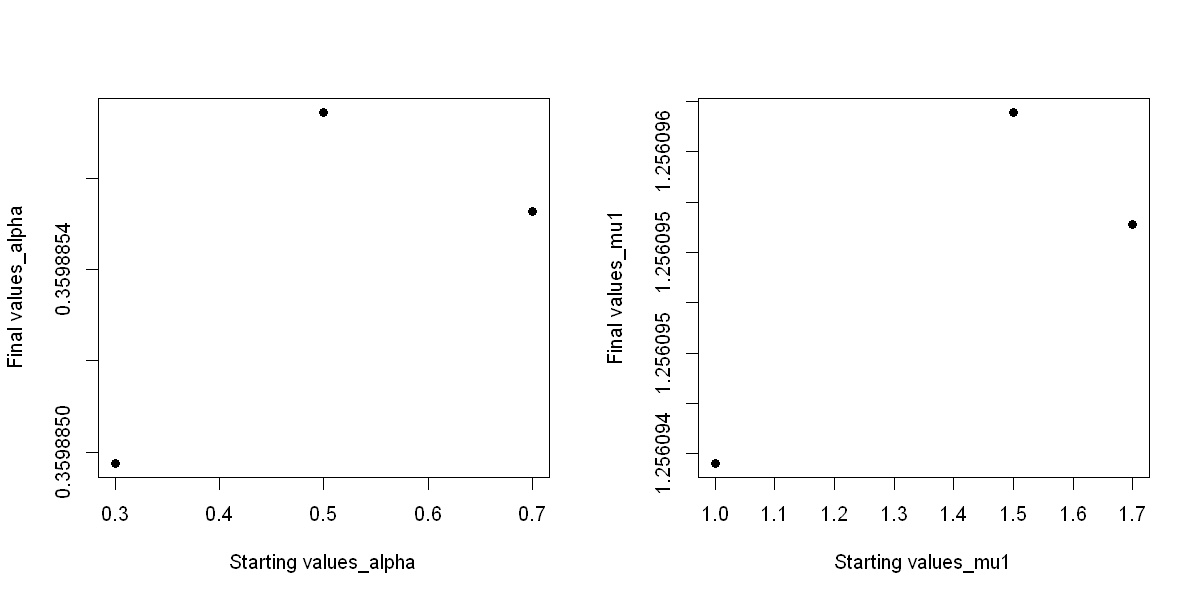

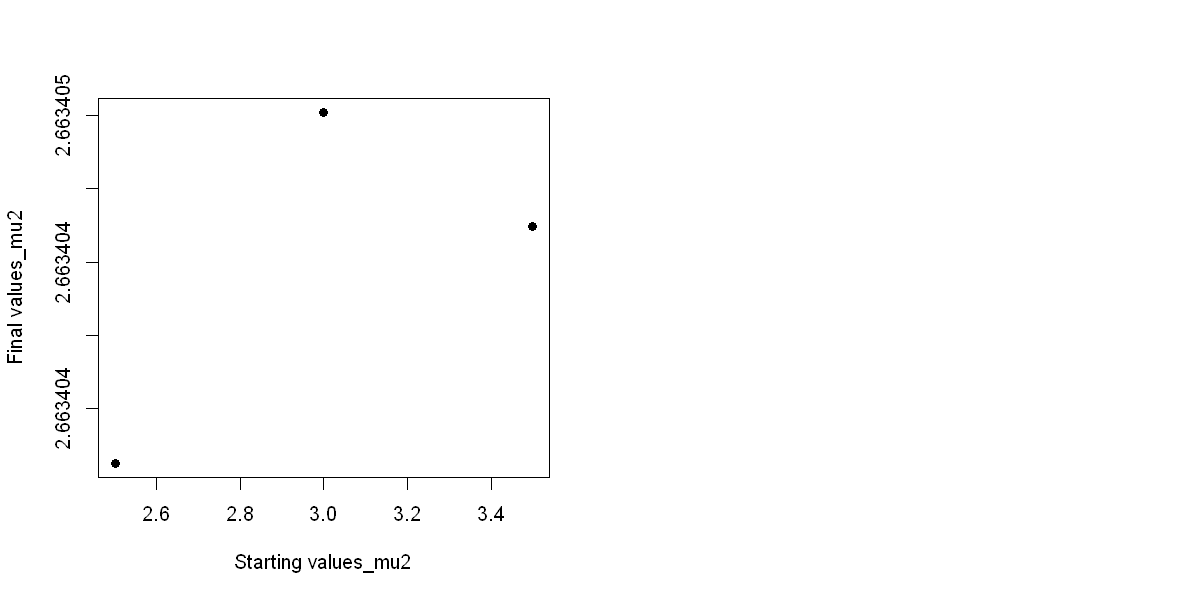

In [27]:
options(repr.plot.width=10,repr.plot.height=5)
par(mfcol=c(1,2))
plot(x=c(start_1[1],start_2[1],start_3[1]),y=result[,1],pch=19,xlab='Starting values_alpha',ylab='Final values_alpha')
plot(x=c(start_1[2],start_2[2],start_3[2]),y=result[,2],pch=19,xlab='Starting values_mu1',ylab='Final values_mu1')
plot(x=c(start_1[3],start_2[3],start_3[3]),y=result[,3],pch=19,xlab='Starting values_mu2',ylab='Final values_mu2')

We see that choosing starting values has a significant impact on the convergence of the gradient ascent algorithm

## Problem 3

Confirm your answer to Question 2 using the built in Python or R optimizers. Also provide a confidence interval for each of the three parameters. 

In [28]:
#First we redefine the log likelihood function that takes one parameter and the function calculates negative
#log likelihood so that we minimize the function using optim
poisson_loglik1 <- function(p){
  alpha <- p[1]
  mu1 <- p[2]
  mu2 <- p[3]
  z <- 0
  for(i in 0:9) {
    p = freq[i+1]*log(alpha*exp(-mu1)*(mu1^i)/facto(i)+(1-alpha)*exp(-mu2)*(mu2^i)/facto(i))
    z=z+p 
  }
  return(-z)
} 

In [29]:
#Now we input the initial value of parameters and the function that needs to be minimized in the 'optim' function
par <- initial_para
result <- optim(par = par, fn = poisson_loglik1,hessian = TRUE)
result$par

[1] 0.3600809 1.2567406 2.6636510

We get initial values of 0.36,1.256 and 2.66 for alpha, mu1 and mu2 respectively which is close to the
value optained using gradient ascent method

In [30]:
#Now we optaine the confidence interval by first calculating the standard error. 
#Standard error is obtained by taking the square root of the diagonal elements of inverse of hessian matrix
#The std. error is then multiplied by 1.96 to obtain the 95% confidence interval
fisher_info<-solve(result$hessian) 
prop_sigma<-sqrt(diag(fisher_info))
upper<-result$par+1.96*prop_sigma
lower<-result$par-1.96*prop_sigma
interval<-data.frame(value=result$par, upper=upper, lower=lower,row.names = c('alpha','mu1','mu2'))
interval 

,value,upper,lower
,<dbl>,<dbl>,<dbl>
alpha,0.3600809,0.7408947,-0.02073289
mu1,1.2567406,1.9408564,0.57262482
mu2,2.6636510,3.1538687,2.17343335


## Problem 4

Implement the EM algorithm approach detailed in Question 11 to fit the parameter $\alpha$, $\mu_1$ and $\mu_2$. 
- Compare the number of steps and the computation time of the EM algorithm to the gradient ascent method you used in Problem 2. 
- State which is faster and why you think this is the case. 
- Lastly, name one advantage of each method. 

In [31]:
#First we define the function Zi(theta)
z_i <- function(alpha,mu1,mu2){
  x<- c()
  for (i in 0:9){
    z <- alpha*exp(-mu1)*(mu1^i)
    y <- alpha*exp(-mu1)*(mu1^i)+(1-alpha)*exp(-mu2)*(mu2^i)
    x<-append(x,(z/y))
  }
  return(x)
}

In [39]:
#We implement the EM algorithm by monitoring the convergence using threshold value of 10^-6 for the difference between
#new likelihood and previous likelihood
em_poisson <- function(){
para <<- matrix(0,ncol=length(initial_para))
para[1,] <<- initial_para
colnames(para) <<- c("alpha","mu1","mu2")
a <- Inf  
ii<-1
while (a>10^-15){    
  alpha_m <- sum(freq*z_i(para[ii,1],para[ii,2],para[ii,3]))/sum(freq)
  mu1_m <- sum(freq*(0:9)*z_i(para[ii,1],para[ii,2],para[ii,3]))/sum(freq*z_i(para[ii,1],para[ii,2],para[ii,3]))
  mu2_m <- sum(freq*(0:9)*(1-z_i(para[ii,1],para[ii,2],para[ii,3])))/sum(freq*(1-z_i(para[ii,1],para[ii,2],para[ii,3])))
  lik_new <- poisson_loglik(alpha_m,mu1_m,mu2_m)
  a <- lik_new - poisson_loglik(para[ii,1],para[ii,2],para[ii,3])
  para <<- rbind(para,c(alpha_m,mu1_m,mu2_m))
  ii = ii + 1
}
  return(para[ii,])
}

In [41]:
#We call the function and check the final values of alpha, mu1 and mu2
em_poisson()

alpha       mu1       mu2 
0.3598832 1.2560914 2.6634017

The values we obtain for alpha, mu1 and mu2 are 0.359, 1.256 and 2.66 respectively which are very close to the actual values

In [42]:
library(microbenchmark)
out <- microbenchmark(poisson_gradient_asc(initial_para),em_poisson())
summary(out)

expr,min,lq,mean,median,uq,max,neval
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
poisson_gradient_asc(initial_para),2234.6231,2288.626,2397.9029,2343.3306,2477.9303,2842.050,100
em_poisson(),766.8387,785.773,823.9453,806.0615,847.1947,1070.491,100


Comparison of methods:<br>
The gradient ascent optimization method has 5 steps: <br>
First calculate log likelihood, then calculate gradient for all the 3 parameters. Then update the parameters and check condition if new likelihood is greater than the previous one. We also need to check for Nan values since gradient may be negative.<br>
The EM algorithm involves calculating Zi, $\alpha$ $\mu1$ and $\mu2$ and updating the value with each iteration until the increase in likelihood is less than a particular threshold.<br>
Hence we can see that the EM algorithm requires less steps as compared to the gradient ascent method.<br>

Also, we can see that the running time of poisson gradient is more than that of EM method. I think that the gradient ascent method is slower since it involves computing the gradient at each iteration which may be computationally expensive. <br>

Advantages of each method:<br>
If we choose good starting values for gradient ascent and the log likelihood function has a close form solution then it will converge faster than EM method.<br>
The EM method is more stable and tends to converge even if the starting values are off target.